<a href="https://colab.research.google.com/github/Suthakaran12/PRODIGY_DS_03/blob/main/PRODIGY_DS_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import zipfile
from sklearn.tree import plot_tree

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PRODIGY_TASKS/bank-additional-full.csv',sep=";")

In [ ]:
# Display the first few rows and check the column names
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Convert categorical variables to dummy/indicator variables
df = pd.get_dummies(df)

# Separate features (X) and target (y)
X = df.drop('y_yes', axis=1)  # X contains all columns except the target
y = df['y_yes']  # y is the target column ('y_yes' indicates whether client subscribed a term deposit)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [ ]:
# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=72)

# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=72)

In [ ]:
# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 1.00
Confusion Matrix:
[[7303    0]
 [   0  935]]
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      7303
        True       1.00      1.00      1.00       935

    accuracy                           1.00      8238
   macro avg       1.00      1.00      1.00      8238
weighted avg       1.00      1.00      1.00      8238



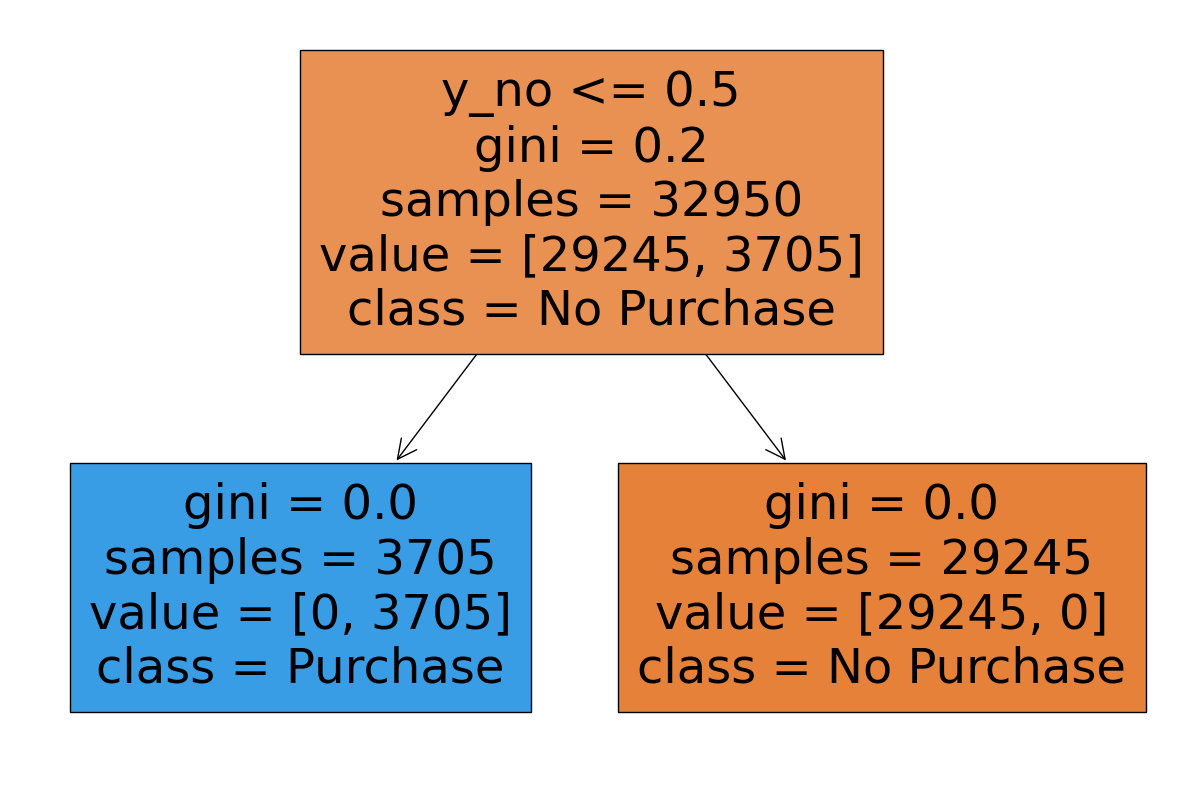

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Purchase', 'Purchase'])
plt.show()
